<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [1]:
# insert code here
# Check keras and tensorflow versions

import sys
import tensorflow as tf
from tensorflow import keras

print("Keras version: ", keras.__version__)
print("Tensorflow version: ", tf.__version__)

Keras version:  2.4.0
Tensorflow version:  2.3.0


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(f'Built with cuda: {tf.test.is_built_with_cuda()}')
print(f'Tensorflow Version: {tf.__version__}')
print(f'Python: {sys.version}')

Num GPUs Available:  0
Built with cuda: False
Tensorflow Version: 2.3.0
Python: 3.8.10 (default, May 19 2021, 13:12:57) [MSC v.1916 64 bit (AMD64)]


In [3]:
## Import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [5]:
# insert code here
# The diabetes dataset
diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### Prepare input data

In [6]:
# insert code here
# input
X = diabetes.data

# print the type of X to check that it is a numpy array
print("X is a ", type(X))

# Print shape to check rows and columns
print("X has {} rows and {} columns".format(X.shape[0], X.shape[1]))

# Save number of columns as n_cols
n_cols = X.shape[1]

# output
y = diabetes.target

print("First 10 values in y: ", y[:10])

X is a  <class 'numpy.ndarray'>
X has 442 rows and 10 columns
First 10 values in y:  [151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]


### Split the data (training/test)

In [8]:
# insert code here
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.3,
    random_state = 65)

### Create the model's architecture

In [9]:
# insert code here
model = Sequential()

In [36]:
# Add the first hidden layer
model.add(Dense(15, activation = 'relu', input_shape = (n_cols, )))
# Add the second hidden layer
model.add(Dense(5, activation = 'relu'))
# Add the output layer
model.add(Dense(1, activation = 'linear'))

In [28]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                165       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 80        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 15)                30        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 452
Trainable params: 452
Non-trainable params: 0
__________________________________________________________

### Compile the model

In [37]:
# insert code here
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse'])

### Fit the training data

In [38]:
# shuffle training data
from sklearn.utils import shuffle
X_train2, y_train2 = shuffle(X_train, y_train, random_state=42)

In [39]:
%%time
# Fit the model
history = model.fit(
    X_train2,
    y_train2,
    validation_split = 0.25,
    batch_size = 10,
    epochs = 100,
    verbose = 0)

Wall time: 12.3 s


### Create predictions

In [32]:
# insert code here
predictions = model.predict(X_test)

### Evaluate the model

In [40]:
# insert code here
# Calculate test MSE
score = model.evaluate(X_test, y_test)
print('\nTest loss: %.6f' % score[0])

5/5 [==============================] - 0s 2ms/step - loss: 29472.8535 - mse: 29472.8535

Test loss: 29472.853516


In [17]:
score

[3313.203125, 3313.203125]

In [41]:
# Find RMSE
score[0] ** (1/2)

171.67659571305867

### Visualisation of cost

In [19]:
history.history

{'loss': [28749.125,
  28725.8515625,
  28696.53125,
  28652.787109375,
  28589.98828125,
  28501.142578125,
  28379.466796875,
  28225.28515625,
  28028.39453125,
  27782.337890625,
  27477.12890625,
  27108.23828125,
  26665.845703125,
  26151.326171875,
  25529.974609375,
  24853.427734375,
  24079.638671875,
  23236.455078125,
  22306.599609375,
  21317.697265625,
  20297.95703125,
  19244.0078125,
  18151.26171875,
  17002.90234375,
  15869.1416015625,
  14722.9375,
  13638.2119140625,
  12560.0107421875,
  11560.640625,
  10570.1591796875,
  9706.4384765625,
  8867.97265625,
  8098.71826171875,
  7415.818359375,
  6860.81640625,
  6363.2529296875,
  5947.16357421875,
  5573.30224609375,
  5293.9189453125,
  5085.5166015625,
  4897.4541015625,
  4741.0888671875,
  4625.93359375,
  4545.62646484375,
  4472.5966796875,
  4414.53369140625,
  4366.72705078125,
  4323.89794921875,
  4286.79443359375,
  4252.287109375,
  4214.8076171875,
  4187.61572265625,
  4164.47412109375,
  4141.72

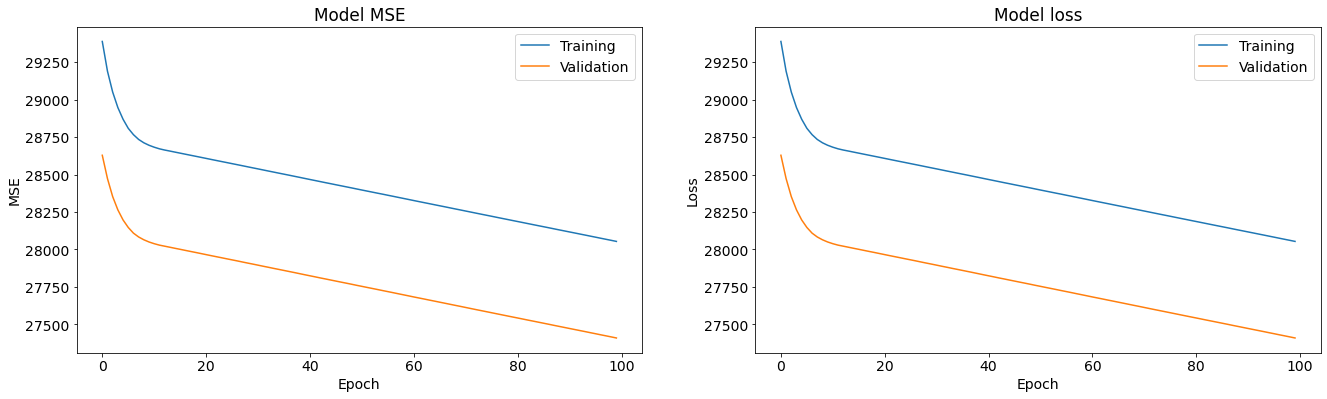

In [42]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 14})

# Plot training & validation accuracy values
ax[0].plot(history.history['mse'], label = 'Training')
ax[0].plot(history.history['val_mse'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualisation of residuals

In [21]:
# insert code here
# Calculate R2 and adjusted R2
r2 = r2_score(y_test, predictions)
n, p = X.shape # sample size, number of explanatory variables
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

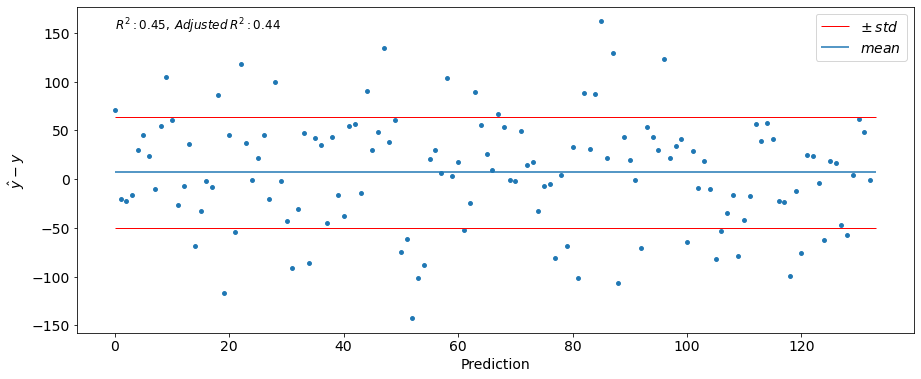

In [22]:
difference = predictions.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
n_pred = len(predictions)
plt.figure(figsize = (15, 6))
plt.scatter(range(n_pred), difference, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw = 1)
plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend()
plt.text(0, difference.max() * 0.95,
         '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),
         fontsize = 12)
plt.show()



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



